<font color = green size =8>Análises descritivas</font>
## Importando bibliotecas e dados 2018

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Accent')     #Coloquei uma paleta de cores
sns.set_style('darkgrid') 


### Área de funções

In [2]:
def grafico(x , y, data,lista,ano):
    ax = ax = sns.barplot(x = x, y = y, data = data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(lista[0] , fontsize = 18, loc = 'left')
    ax.set_ylabel(lista[1], fontsize = 14)
    ax.set_xlabel(lista[2], fontsize = 14)
    ax= ax
    plt.savefig('dados/imagens/'+str(ano) + lista[0]+'.png', dpi = 300)
    plt.show()

In [3]:
def maximos(dataframe):
    max_valor_ano_media = dataframe['mean'].max()
    max_mes_ano_media = dataframe.loc[dataframe['mean'] == max_valor_ano_media].index[0]
    max_valor_ano_std = dataframe['std'].max()
    max_mes_ano_std = dataframe.loc[dataframe['std'] == max_valor_ano_std].index[0]
    print(f'O maior gasto médio do ano foi de {max_valor_ano_media}, no mês {max_mes_ano_media}, E teve um desvio padrão máximo de {max_valor_ano_std} no mes {max_mes_ano_std}')

# Criando modelo aumentomático de análise

In [19]:
gastos_total_anual = []

In [8]:
def analisa(ano):
    ## Ler os dados
    df = pd.read_csv('dados/despesa_ceaps_'+str(ano)+'_alterado.csv', sep =';')
    
    ## Separar os novos dataframes
    meses = df.groupby(by='MES')['VALOR_REEMBOLSADO'].agg({'mean','std'}).round(2)
    media_std=df.groupby(by='MES')['VALOR_REEMBOLSADO'].agg({'mean','std'}).round(2)
    tipo_gastos=df.groupby(by='TIPO_DESPESA')['VALOR_REEMBOLSADO'].agg({'mean','std'}).round(2)
    senador=df.groupby(by='SENADOR')['VALOR_REEMBOLSADO'].agg({'mean','std'}).round(2)
    max_media = senador.loc[senador['mean'] == senador['mean'].max()].index[0]
    Senador_maximo = df[df['SENADOR'].isin([str(max_media)])]
    gastos_maximo = Senador_maximo.groupby(by='TIPO_DESPESA')['VALOR_REEMBOLSADO'].agg({'mean'}).round(2)
    diferenca = gastos_maximo['mean'] - tipo_gastos['mean']
    diferenca = pd.DataFrame(diferenca.dropna())
    
    ## Detalhes de máximos de gastos
    maximos(meses) #Informa o mês que gastou a maior média e qual foi o desvio padrão.
    max_desvio = senador.loc[senador['std'] == senador['std'].max()].index[0]  #Qual senador tem a maior variação de gastos
    max_media = senador.loc[senador['mean'] == senador['mean'].max()].index[0] #Qual senador tem a maior média de gastos
    max_tipo_gasto =  diferenca.loc[diferenca['mean'] == diferenca.max()[0]].index[0] #Qual é o tipo de maior gasto do senador
    max_valor_gasto = diferenca.max()[0].round(2) # Qual é o valor em que o senador mais gastou
    gasto_total = df['VALOR_REEMBOLSADO'].sum().round(2) # A soma de todos os gastos do ano.
    gastos_total_anual.append(gasto_total)
    ## Prints dos detalhes    
    print(f'O senador que tem a maior media de gastos é: {max_media}, e o que tem a maior variação dos gastos é: {max_desvio}')
    print(f'O/a {max_media} gastou uma diferenca de máxima de {max_valor_gasto} em {max_tipo_gasto}')
    print(f'O gasto total deste ano foi de {gasto_total}')
    
    ## Gráficos
    grafico(x = 'MES', y = 'VALOR_REEMBOLSADO', data = df, lista = ['Valor de reembolso durante o ano', 'Valor', 'Mes'],ano = ano)
    grafico(x = media_std.index, y = 'std', data = media_std, lista = ['Desvio padrão do reembolso', 'Valor do desvio padrao', 'Mes'],ano = ano)
    grafico(x = tipo_gastos.index, y = 'mean', data = tipo_gastos, lista = ['Valor médios dos gastos por tipo', 'Valor', 'Tipo'],ano = ano)
    grafico(x = gastos_maximo.index, y = 'mean', data = gastos_maximo, lista = ['Gastos média por tipo do ' + str(max_media).lower(), 'Valor', 'Tipo'],ano = ano)
    grafico(x = diferenca.index, y = 'mean', data = diferenca, lista = ['Diferenca de gastos de media e '+str(max_media).lower(), 'Valor', 'Tipo'],ano = ano)

O maior gasto médio do ano foi de 1719.77, no mês 12, E teve um desvio padrão máximo de 5961.41 no mes 12
O senador que tem a maior media de gastos é: FERNANDO COLLOR, e o que tem a maior variação dos gastos é: SERGIO PETECAO
O/a FERNANDO COLLOR gastou uma diferenca de máxima de 20072.07 em seguranca
O gasto total deste ano foi de 25145760.49


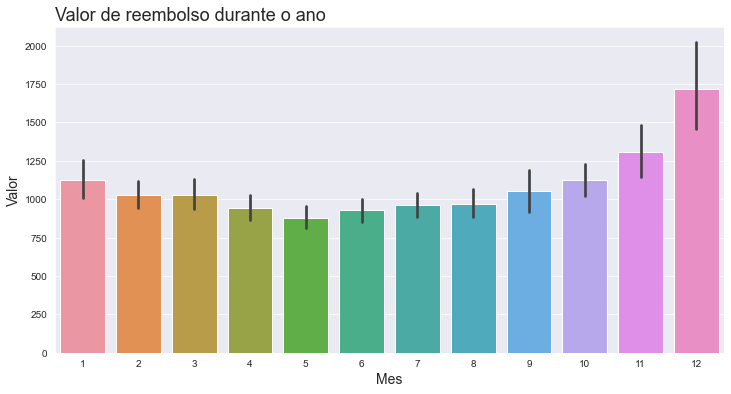

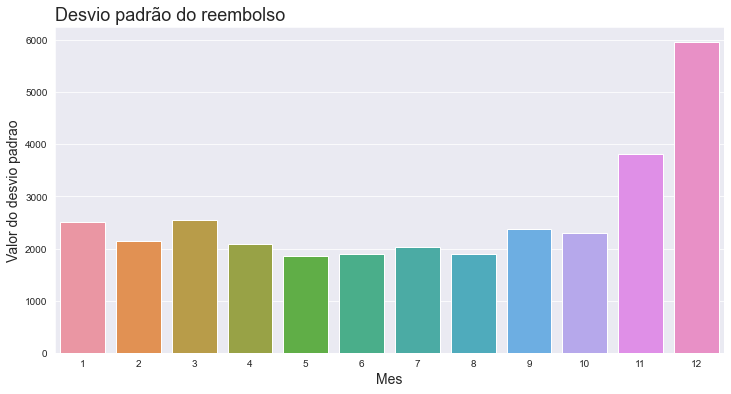

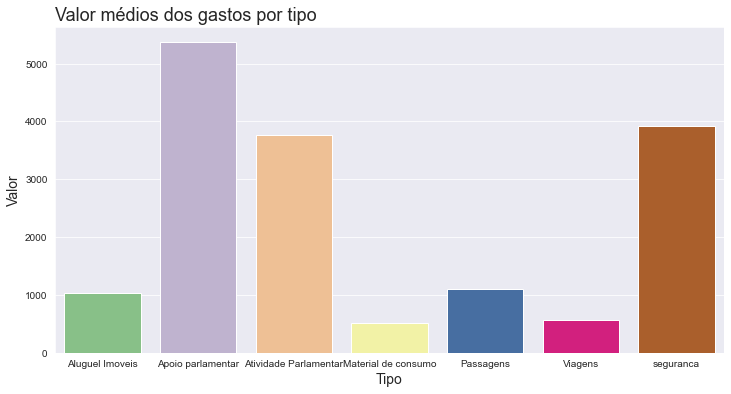

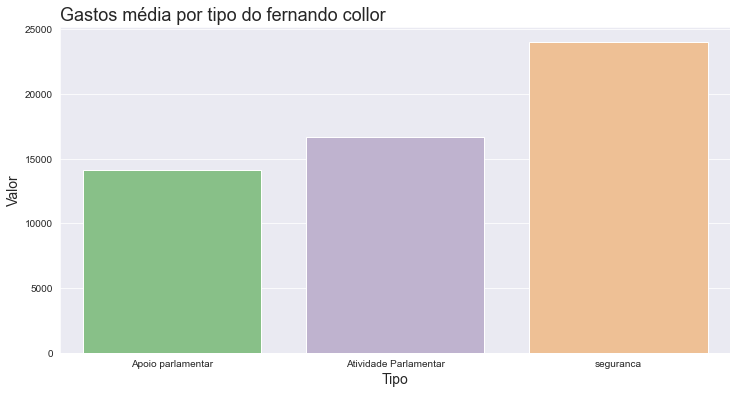

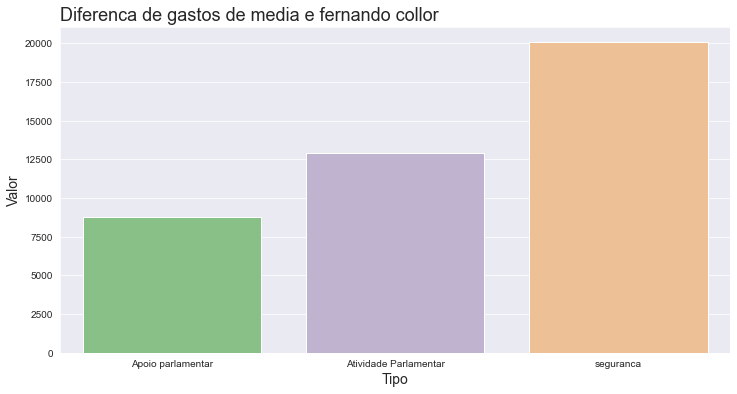

In [20]:
analisa(2018)

O maior gasto médio do ano foi de 1632.29, no mês 12, E teve um desvio padrão máximo de 4244.22 no mes 12
O senador que tem a maior media de gastos é: VICENTINHO ALVES, e o que tem a maior variação dos gastos é: DAVI ALCOLUMBRE
O/a VICENTINHO ALVES gastou uma diferenca de máxima de 19105.87 em Apoio parlamentar
O gasto total deste ano foi de 24689754.94


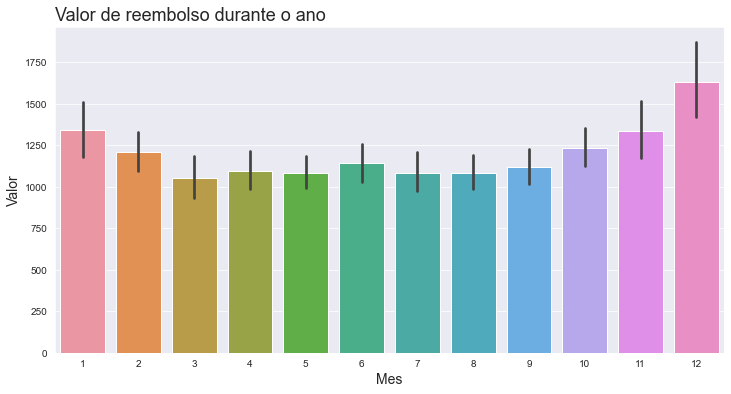

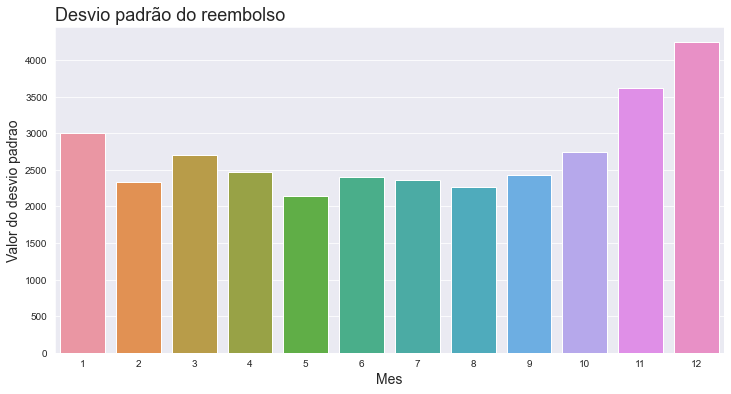

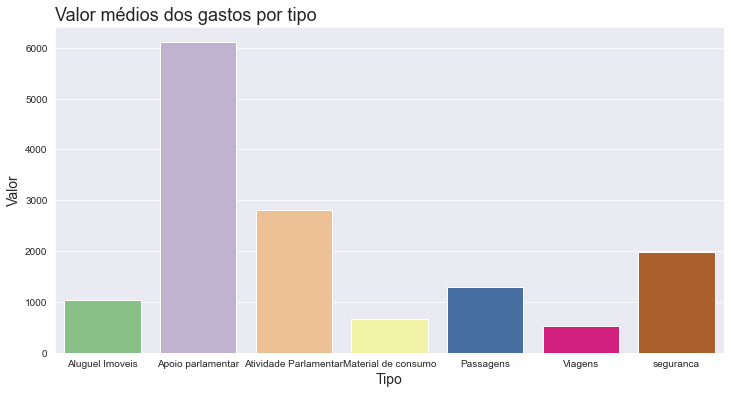

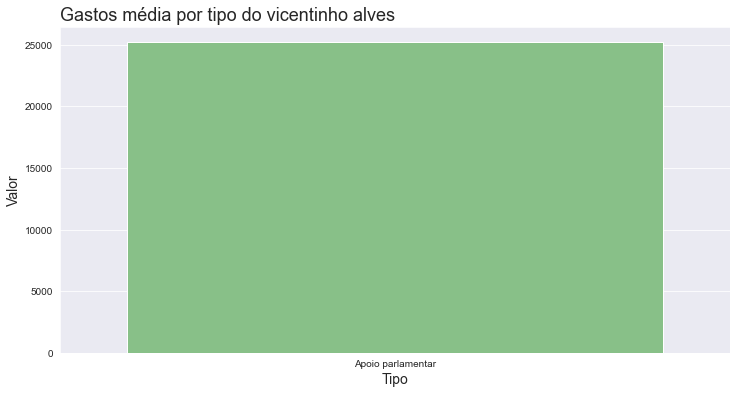

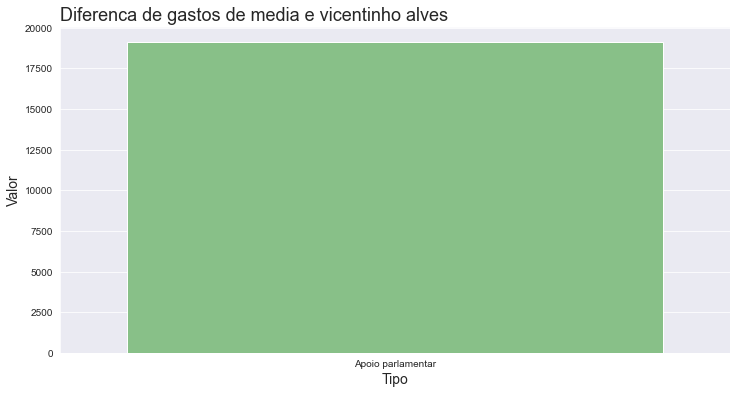

In [21]:
analisa(2019)

O maior gasto médio do ano foi de 2321.47, no mês 12, E teve um desvio padrão máximo de 7171.67 no mes 12
O senador que tem a maior media de gastos é: JADER BARBALHO, e o que tem a maior variação dos gastos é: SERGIO PETECAO
O/a JADER BARBALHO gastou uma diferenca de máxima de 22169.86 em Atividade Parlamentar
O gasto total deste ano foi de 20061623.61


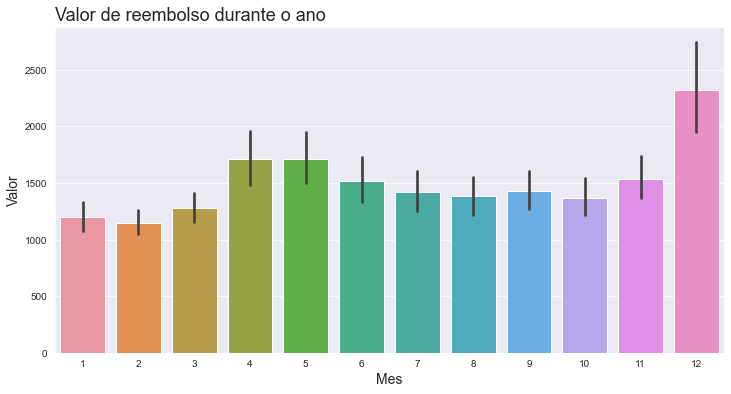

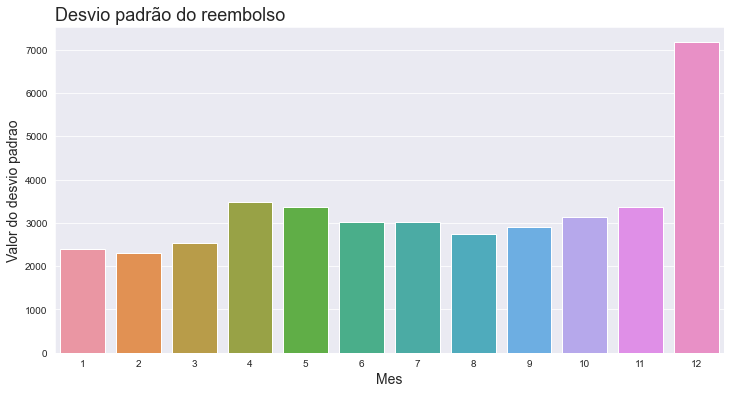

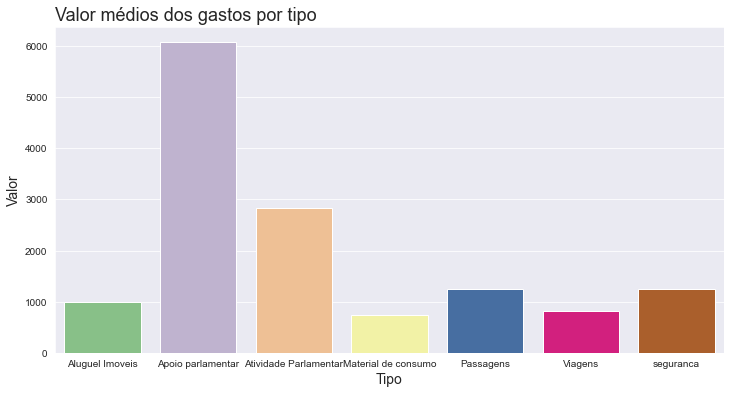

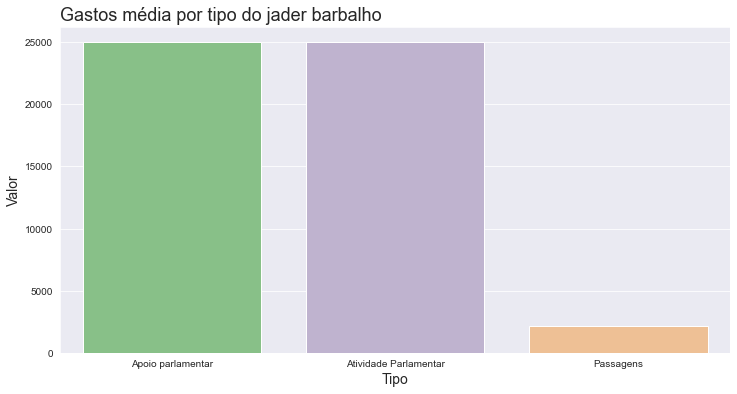

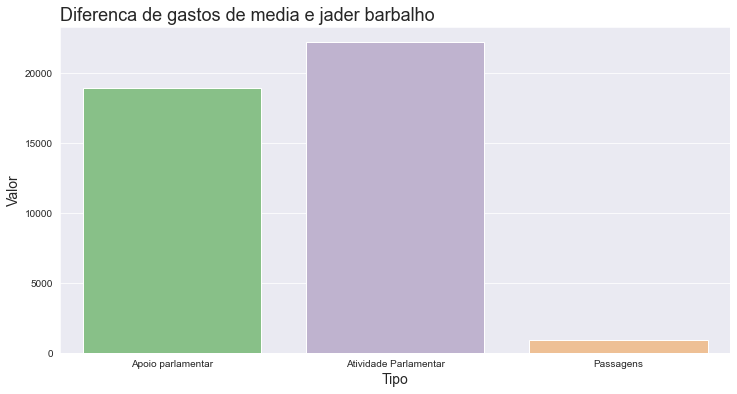

In [22]:
analisa(2020)

O maior gasto médio do ano foi de 1838.93, no mês 12, E teve um desvio padrão máximo de 4447.91 no mes 12
O senador que tem a maior media de gastos é: JADER BARBALHO, e o que tem a maior variação dos gastos é: SERGIO PETECAO
O/a JADER BARBALHO gastou uma diferenca de máxima de 22083.61 em Atividade Parlamentar
O gasto total deste ano foi de 24483157.7


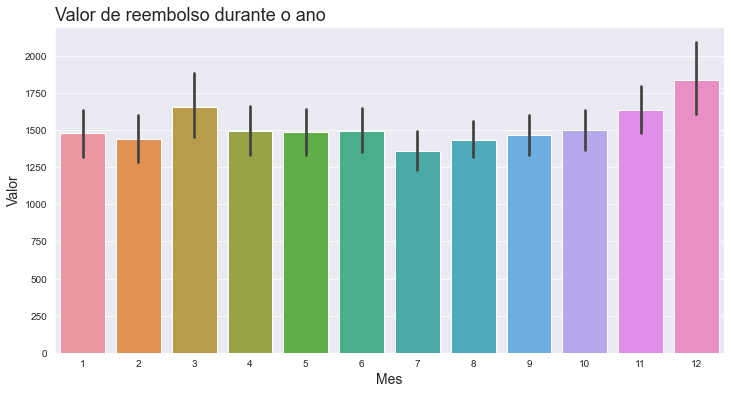

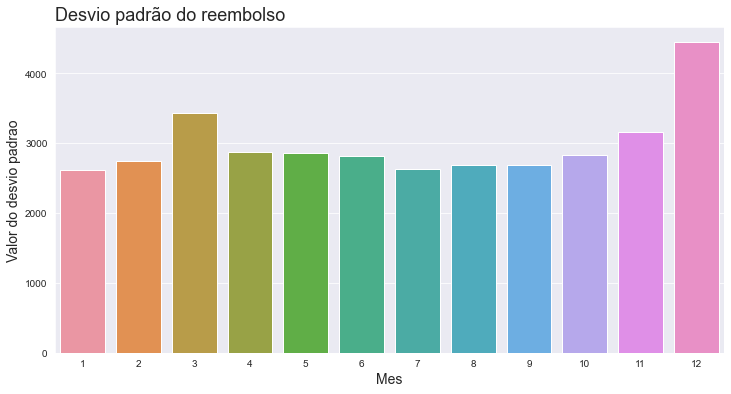

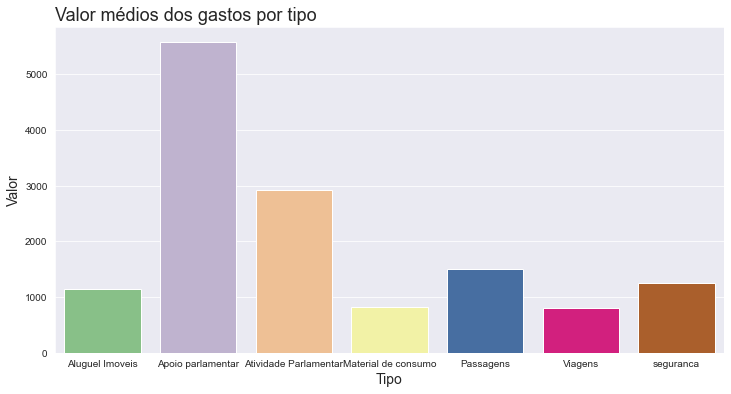

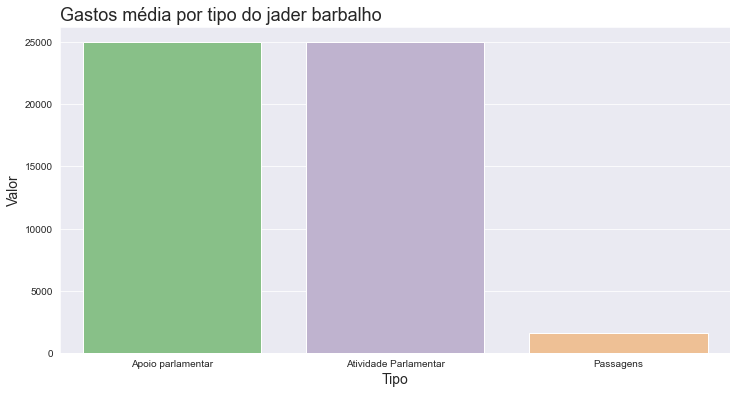

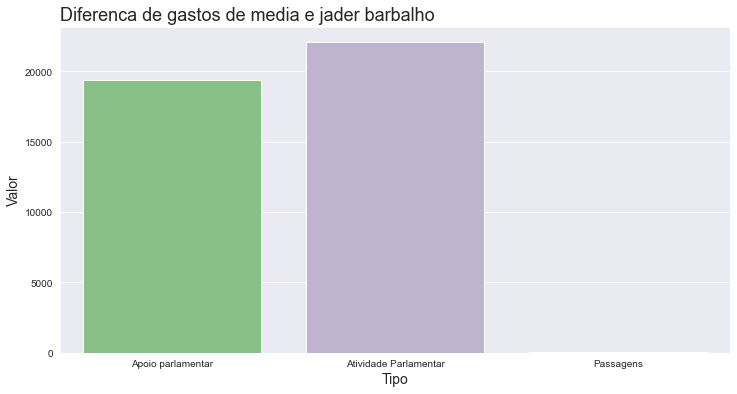

In [23]:
analisa(2021)

O maior gasto médio do ano foi de 2654.25, no mês 4, E teve um desvio padrão máximo de 4728.89 no mes 4
O senador que tem a maior media de gastos é: JADER BARBALHO, e o que tem a maior variação dos gastos é: SERGIO PETECAO
O/a JADER BARBALHO gastou uma diferenca de máxima de 21774.82 em Atividade Parlamentar
O gasto total deste ano foi de 6160371.43


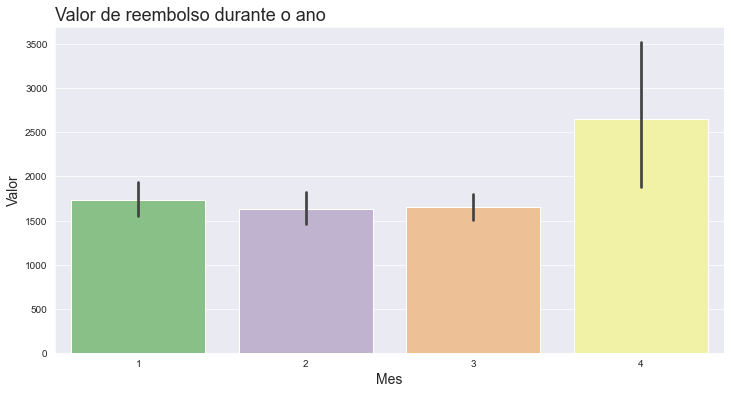

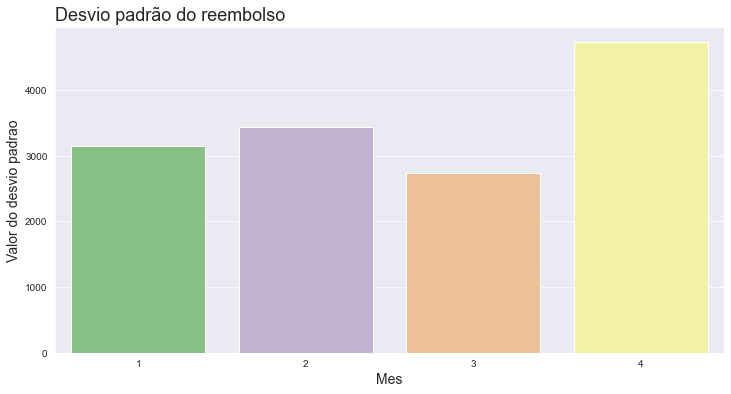

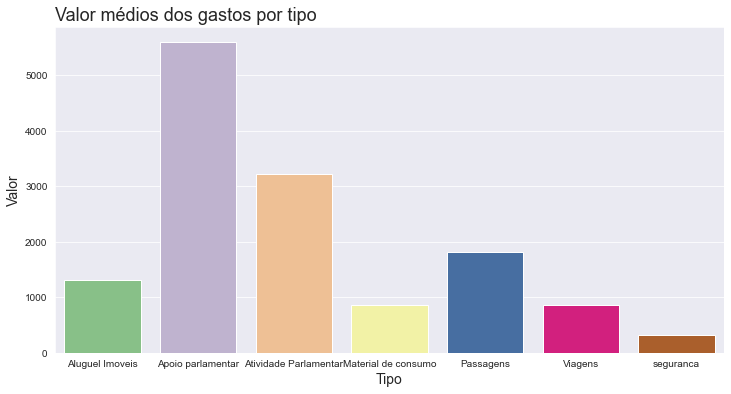

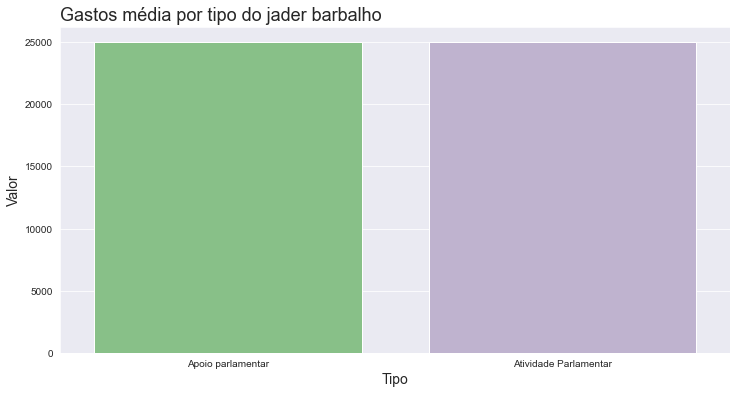

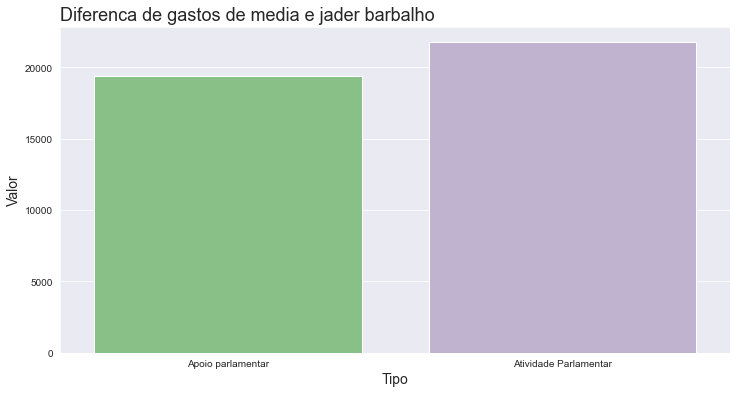

In [24]:
analisa(2022)

In [29]:
dft = pd.DataFrame(gastos_total_anual)
dft.rename(index={0 : 2018,1:2019,2:2020,3:2021,4:2022}, inplace = True)
dft

,0
2018,25145760.49
2019,24689754.94
2020,20061623.61
2021,24483157.70
2022,6160371.43


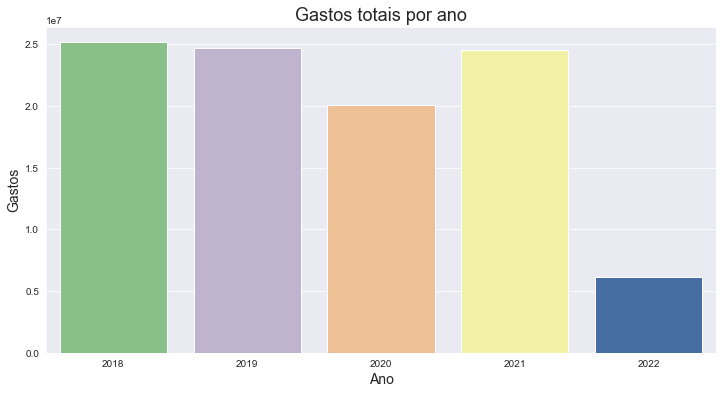

In [33]:
ax = sns.barplot(x =dft.index , y =0 , data = dft)
ax.figure.set_size_inches(12,6)
ax.set_title('Gastos totais por ano' , fontsize = 18, loc = 'center')
ax.set_ylabel('Gastos', fontsize = 14)
ax.set_xlabel('Ano', fontsize = 14)
ax= ax
plt.savefig('dados/imagens/gastos_Totais_2018_2022.png', dpi = 300)
plt.show()